**Importing Libraries**

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
import datetime as dt
import missingno as msno
plt.rcParams['figure.dpi'] = 140

**Importing the dataFrame**

In [31]:
#import DataFrame
DF = pd.read_csv('World Energy Consumption.csv')
#Filter on needed columns
DF=DF[['country','year','coal_production','electricity_generation','biofuel_electricity','coal_electricity','fossil_electricity','gas_electricity','hydro_electricity','nuclear_electricity','oil_electricity',
       'renewables_electricity','oil_production','population','gdp','solar_electricity','wind_electricity','energy_per_gdp','energy_per_capita','fossil_share_elec','gas_share_elec','gas_production','low_carbon_share_elec']]
#Filter on year >=2019
DF=DF[DF['year']>=1990]
#Filter on countries 
Countries=['Egypt','New Zealand','China','Malaysia','Sweden','United States','Japan','India']
#filter columns
DF=DF.loc[DF['country'].isin(Countries)]

DF.head(10)

,country,year,coal_production,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,...,population,gdp,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,fossil_share_elec,gas_share_elec,gas_production,low_carbon_share_elec
3435,China,1990,6279.525,621.20,NaN,441.251,494.388,2.771,126.744,0.000,...,1.176884e+09,2.790000e+12,0.002,0.002,2.858,6774.271,79.586,0.446,154.184,20.414
3436,China,1991,6323.271,677.55,NaN,498.434,552.786,2.429,124.689,0.000,...,1.192897e+09,2.930000e+12,0.002,0.009,2.859,7021.384,81.586,0.358,156.119,18.414
3437,China,1992,6491.755,753.94,NaN,567.330,623.007,2.467,130.686,0.000,...,1.206711e+09,3.180000e+12,0.003,0.131,2.774,7309.315,82.633,0.327,159.142,17.367
3438,China,1993,6691.151,811.59,NaN,589.228,657.806,3.124,151.846,1.604,...,1.218817e+09,3.530000e+12,0.004,0.212,2.690,7792.128,81.052,0.385,168.969,18.948
3439,China,1994,7210.030,927.80,NaN,693.408,744.761,3.154,167.429,14.756,...,1.230020e+09,3.730000e+12,0.005,0.384,2.703,8195.959,80.272,0.340,176.971,19.728
3440,China,1995,7912.657,1007.03,NaN,741.886,799.979,2.999,190.580,12.833,...,1.240921e+09,3.970000e+12,0.007,0.616,2.617,8373.590,79.439,0.298,180.912,20.560
3441,China,1996,8121.814,1081.31,NaN,824.184,877.363,2.828,187.970,14.338,...,1.251636e+09,4.250000e+12,0.009,0.094,2.572,8734.282,81.139,0.262,202.722,18.861
3442,China,1997,8068.501,1135.55,NaN,867.027,922.219,8.077,195.980,14.418,...,1.261996e+09,4.350000e+12,0.011,0.198,2.528,8712.993,81.213,0.711,228.816,18.786
3443,China,1998,7745.753,1167.00,NaN,891.674,951.158,6.092,198.890,14.100,...,1.271982e+09,4.400000e+12,0.014,0.356,2.502,8656.426,81.505,0.522,234.621,18.495
3444,China,1999,7931.651,1239.30,NaN,969.684,1024.758,4.813,196.580,14.949,...,1.281515e+09,4.700000e+12,0.017,0.474,2.425,8893.213,82.688,0.388,253.962,17.311


**Cleaning the data**

In [32]:
#looks like we have a lot of empty Values
nulls=DF.isna().sum()
nulls

country                    0
year                       0
coal_production           96
electricity_generation     0
biofuel_electricity       80
coal_electricity          20
fossil_electricity        20
gas_electricity           20
hydro_electricity          0
nuclear_electricity        0
oil_electricity           20
renewables_electricity     0
oil_production            96
population                 6
gdp                       30
solar_electricity          0
wind_electricity           0
energy_per_gdp            30
energy_per_capita          6
fossil_share_elec         20
gas_share_elec            20
gas_production            96
low_carbon_share_elec      0
dtype: int64

In [33]:
#For Items like GDP  it doesnt make sense to replace the null values with a 0 ,so let's try FWD fill and then backwards fill
#looks like we have a lot of empty Values
nulls=DF.isna().sum()
for i in nulls.index:
    if nulls[i]>0:
        DF[i].ffill(inplace=True)
        DF[i].bfill(inplace=True)
DF.isna().sum()

country                   0
year                      0
coal_production           0
electricity_generation    0
biofuel_electricity       0
coal_electricity          0
fossil_electricity        0
gas_electricity           0
hydro_electricity         0
nuclear_electricity       0
oil_electricity           0
renewables_electricity    0
oil_production            0
population                0
gdp                       0
solar_electricity         0
wind_electricity          0
energy_per_gdp            0
energy_per_capita         0
fossil_share_elec         0
gas_share_elec            0
gas_production            0
low_carbon_share_elec     0
dtype: int64

**Training And Testing Data**

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [35]:
# Load the dataset into a Pandas dataframe
df = pd.read_csv('World Energy Consumption.csv')

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df[['country', 'year', 'carbon_intensity_elec', 'coal_production', 'electricity_generation', 'biofuel_electricity', 'coal_electricity', 'fossil_electricity', 'gas_electricity', 'hydro_electricity', 'nuclear_electricity', 'oil_electricity', 'renewables_electricity', 'solar_electricity', 'wind_electricity', 'energy_per_gdp', 'energy_per_capita', 'fossil_share_elec', 'gas_share_elec', 'gas_production', 'low_carbon_share_elec', 'oil_production', 'population']].apply(LabelEncoder().fit_transform), df[['gdp']].apply(LabelEncoder().fit_transform), test_size=0.2, random_state=0)


In [37]:
# Train a linear regression model using the training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [38]:
# Use the trained model to make predictions on the training set and calculate the R2 score
from sklearn.metrics import r2_score

y_train_pred = regressor.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print('Training set R2 score:', r2_train)


Training set R2 score: 0.3192718568885481


In [39]:
# Use the trained model to make predictions on the testing set and calculate the R2 score
y_test_pred = regressor.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print('Testing set R2 score:',r2_test)

Testing set R2 score: 0.3145148369408486


**Selecting the color scheme**

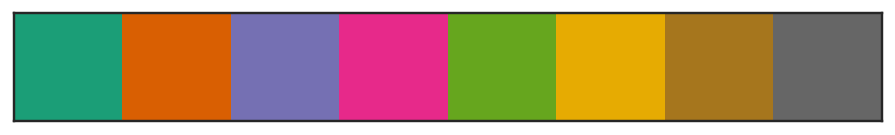

In [40]:
palette="Dark2"
sns.set_palette(palette)
sns.palplot(sns.color_palette(palette))
plt.show()

**Heatmap Matrix Correlation**

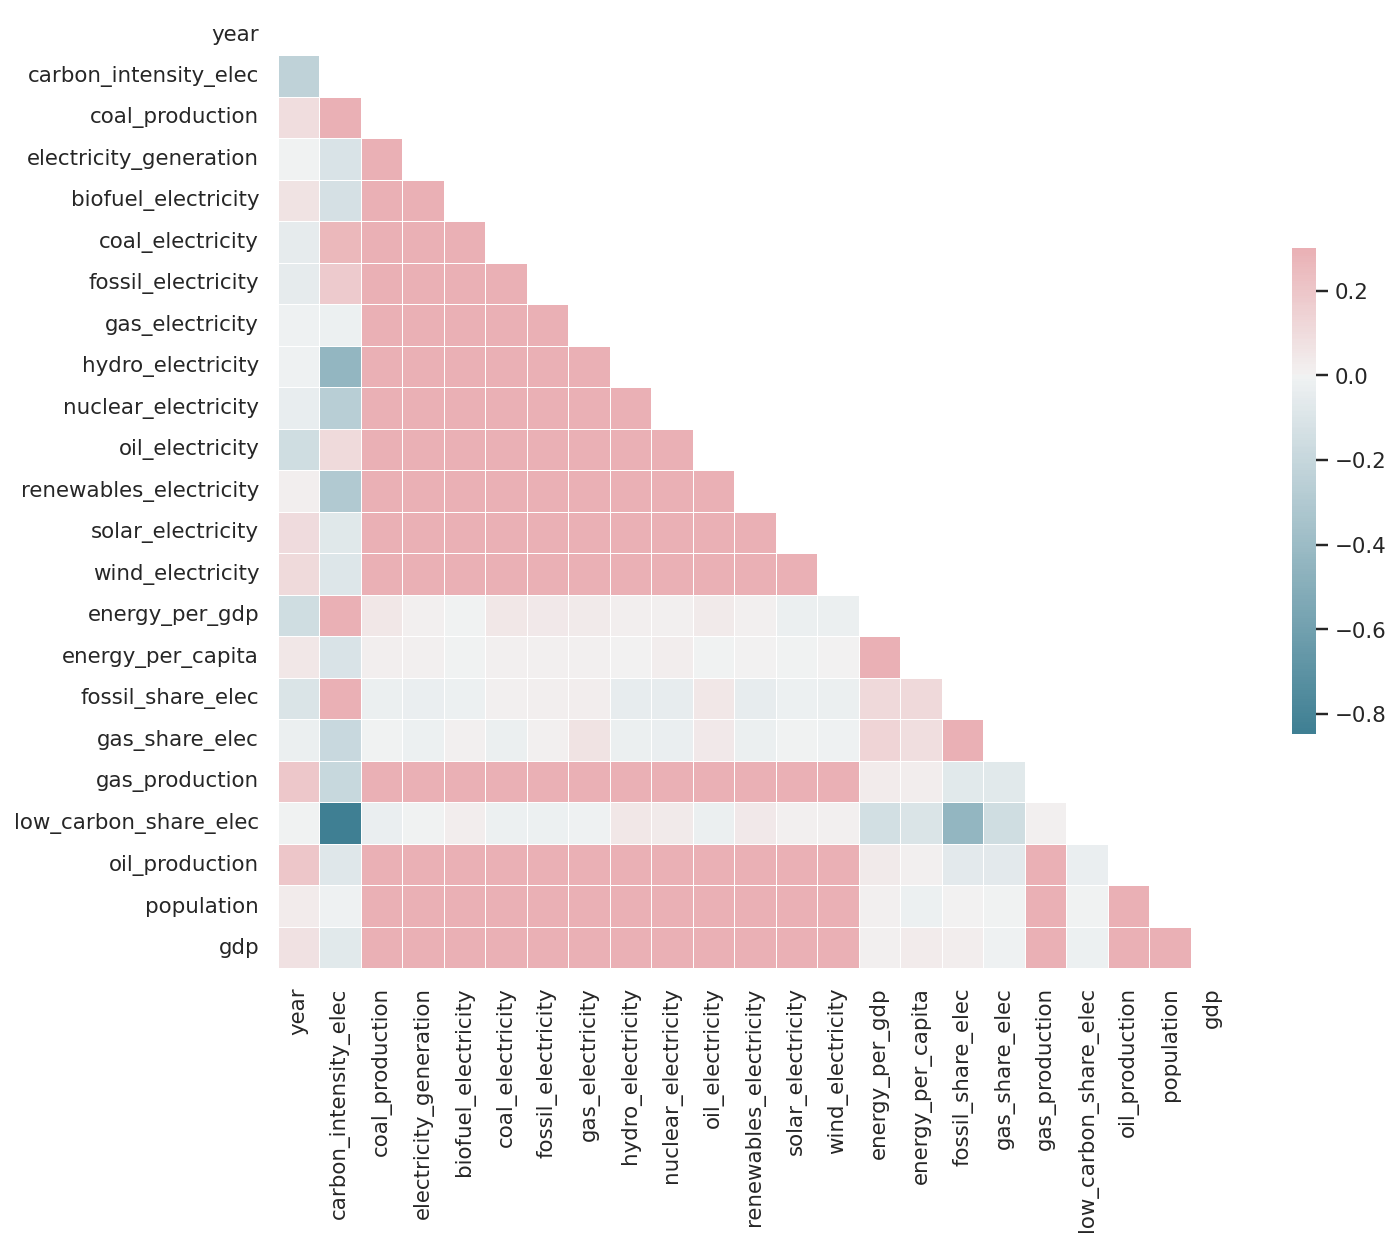

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data into a pandas DataFrame
data = pd.read_csv('World Energy Consumption.csv')

# Select only the 25 important columns
important_columns = ['country', 'year', 'carbon_intensity_elec', 'coal_production', 'electricity_generation', 'biofuel_electricity', 'coal_electricity', 'fossil_electricity', 'gas_electricity', 'hydro_electricity', 
                     'nuclear_electricity', 'oil_electricity', 'renewables_electricity', 'solar_electricity', 'wind_electricity', 'energy_per_gdp', 'energy_per_capita', 'fossil_share_elec', 'gas_share_elec', 'gas_production', 
                     'low_carbon_share_elec', 'oil_production', 'population', 'gdp']
data = data[important_columns]

# Compute the correlation matrix
corr = data.corr()

# Plot the heatmap using Seaborn
sns.set(style="white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

**GDP Vs Population Trends**

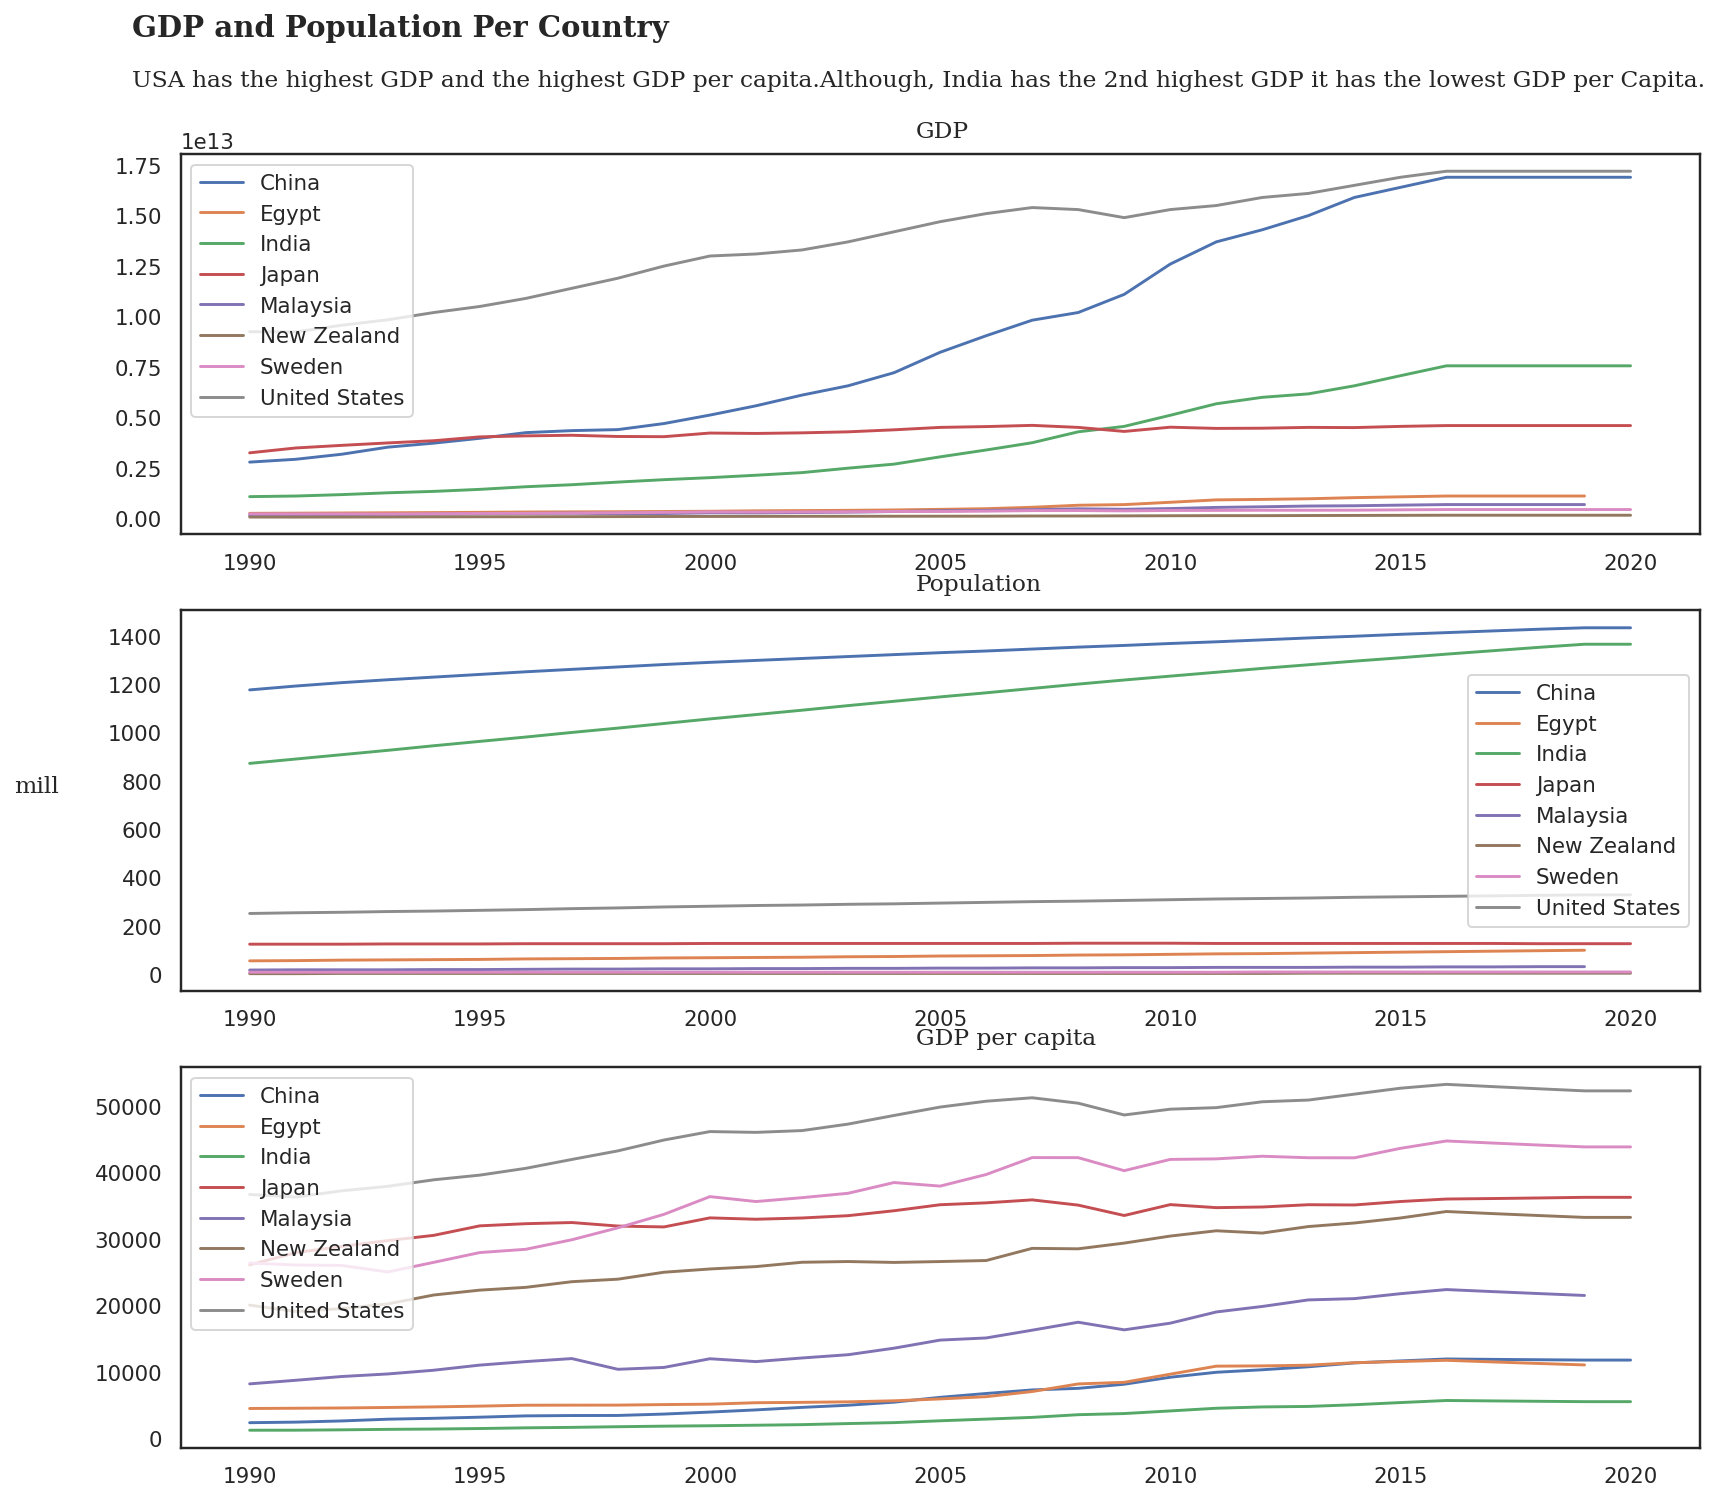

In [42]:
# lets plot the gdp , population and gdp per capita  per country
DF_gdp=DF.groupby(['year','country'])['gdp'].sum().unstack('country')
DF_pop=DF.groupby(['year','country'])['population'].sum().unstack('country')
DF_pop_mil=round(DF_pop/1000000)
DF['gdp_per_capita']=round(DF['gdp']/DF['population'])
DF_gdp_per_capita=DF.groupby(['year','country'])['gdp_per_capita'].sum().unstack('country')
fig, ax = plt.subplots(3, 1, figsize=(14, 12))
ax[0].plot(DF_gdp,label=DF_gdp.columns)
ax[0].legend()
ax[1].plot(DF_pop_mil,label=DF_pop_mil.columns)
ax[1].legend()
ax[2].plot(DF_gdp_per_capita,label=DF_gdp_per_capita.columns)
ax[2].legend()
fig.text(0.1, 0.95, 'GDP and Population Per Country', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.1, 0.92, '''USA has the highest GDP and the highest GDP per capita.Although, India has the 2nd highest GDP it has the lowest GDP per Capita.''', fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.04, 0.5, '''mill''', fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.5, 0.89, '''GDP''', fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.5, 0.62,'''Population''', fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.5, 0.35,'''GDP per capita''', fontsize=12, fontweight='light', fontfamily='serif')

plt.show()

**Slicing through the years for 2010-2015 VS 2016-2020**

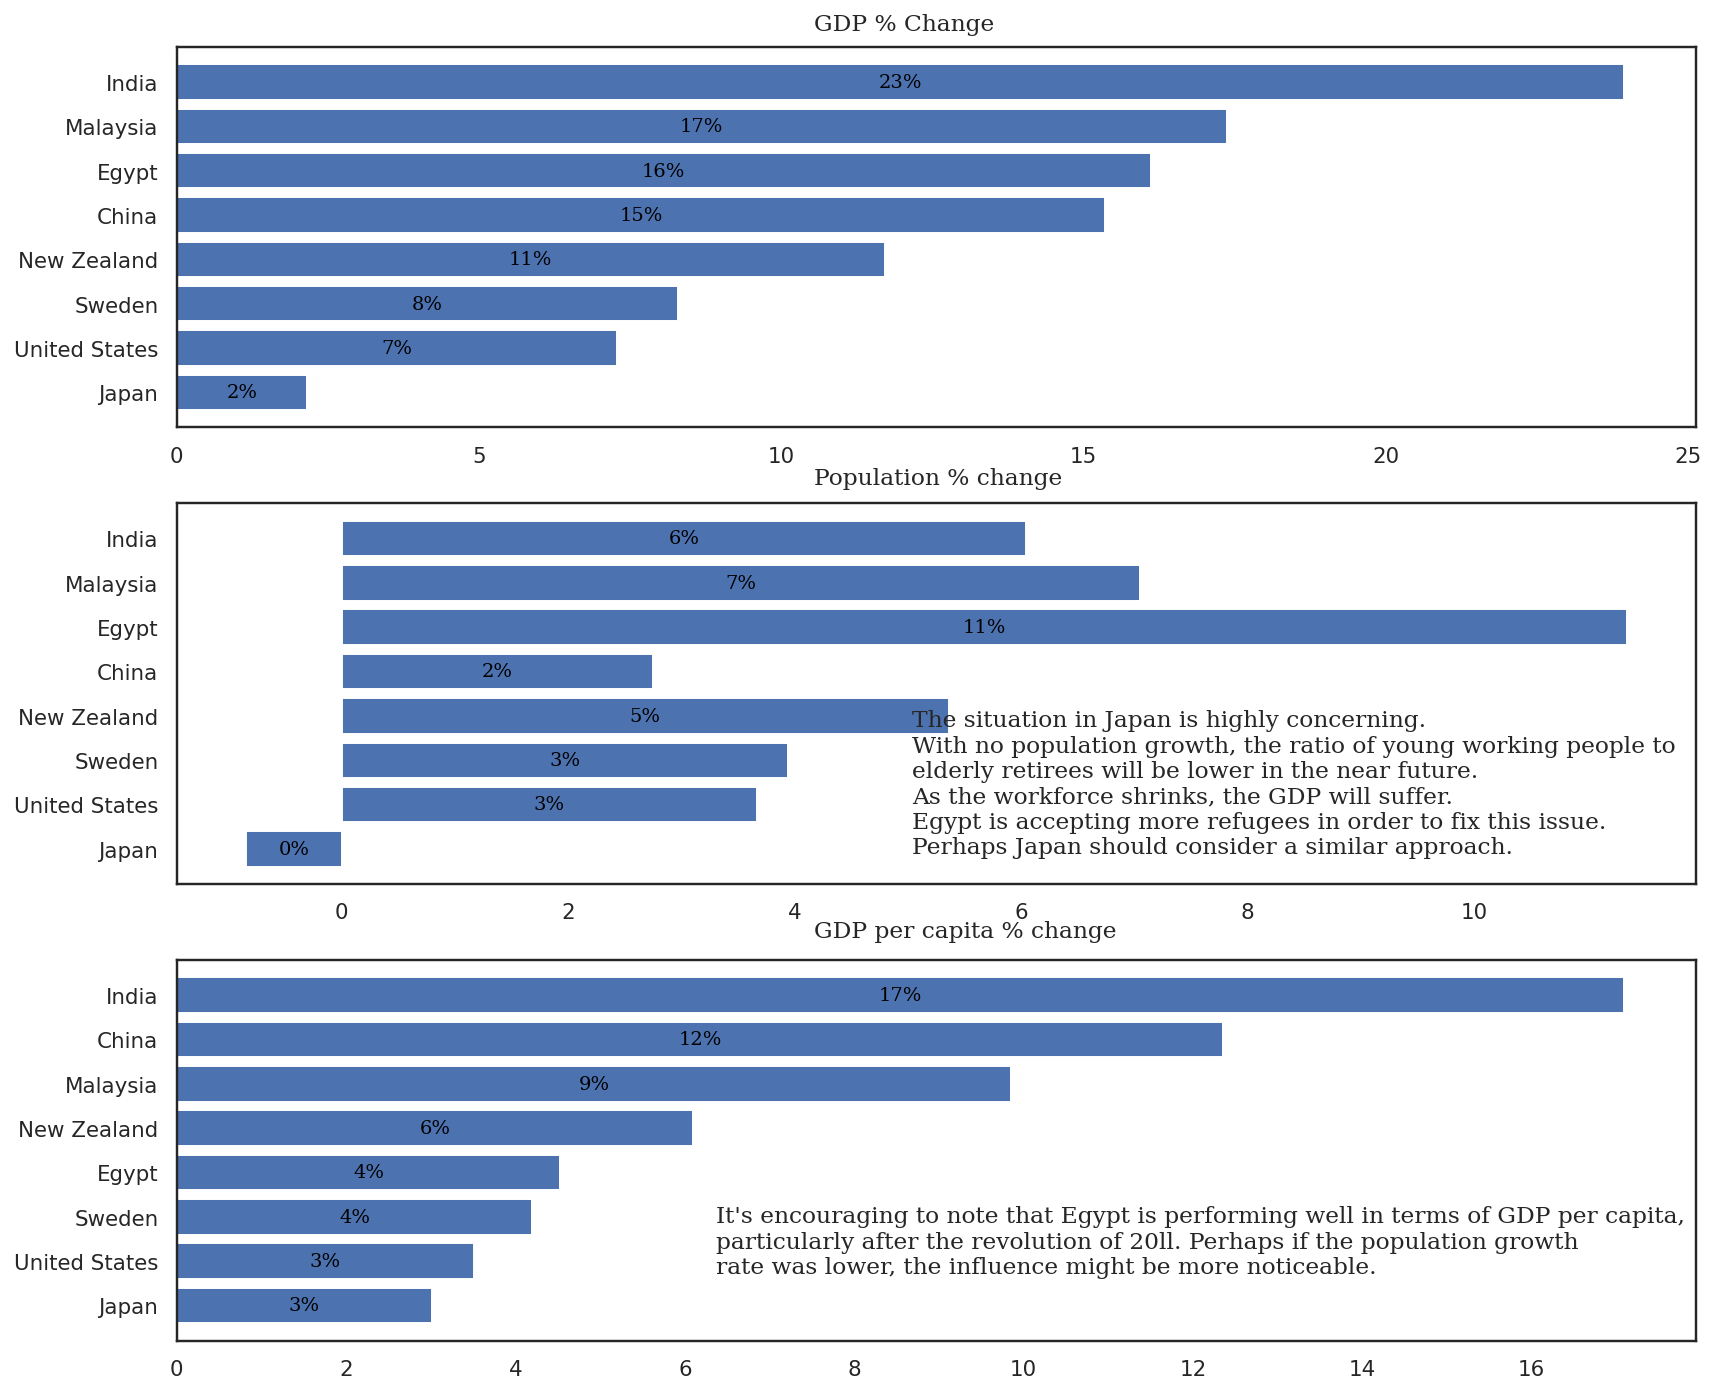

In [43]:
#We will create a comparision between the cannges in gdp and population per country in the 
#durations 2010-2015 and 2016-2020
#gdp %increase
DF_comparision =pd.DataFrame()
DF_comparision['DF_2010_2015_gdp']=DF[(DF['year']>=2010) & (DF['year']<=2015)].groupby('country')['gdp'].mean()
DF_comparision['DF_2016_2020_gdp']=DF[(DF['year']>=2016) & (DF['year']<=2020)].groupby('country')['gdp'].mean()
DF_comparision['gdp_diffrence%']=100*(DF_comparision['DF_2016_2020_gdp']-DF_comparision['DF_2010_2015_gdp'])/DF_comparision['DF_2010_2015_gdp']
DF_comparision.sort_values('gdp_diffrence%',ascending=True,inplace=True)
fig, ax = plt.subplots(3, 1, figsize=(14, 12))
ax[0].barh(DF_comparision.index,DF_comparision['gdp_diffrence%'])
for i in DF_comparision.index:
    ax[0].annotate(f"{int(DF_comparision['gdp_diffrence%'][i])}%", 
                   xy=(DF_comparision['gdp_diffrence%'][i]/2, i),
                   va = 'center', ha='center',fontsize=10, fontweight='light', fontfamily='serif',
                   color='black')
    
#pop %increase
DF_comparision['DF_2010_2015_pop']=DF[(DF['year']>=2010) & (DF['year']<=2015)].groupby('country')['population'].mean()
DF_comparision['DF_2016_2020_pop']=DF[(DF['year']>=2016) & (DF['year']<=2020)].groupby('country')['population'].mean()
DF_comparision['pop_diffrence%']=100*(DF_comparision['DF_2016_2020_pop']-DF_comparision['DF_2010_2015_pop'])/DF_comparision['DF_2010_2015_pop']
DF_comparision.sort_values('gdp_diffrence%',ascending=True,inplace=True)
DF_comparision.head()
ax[1].barh(DF_comparision.index,DF_comparision['pop_diffrence%'])
for i in DF_comparision.index:
    ax[1].annotate(f"{int(DF_comparision['pop_diffrence%'][i])}%", 
                   xy=(DF_comparision['pop_diffrence%'][i]/2, i),
                   va = 'center', ha='center',fontsize=10, fontweight='light', fontfamily='serif',
                   color='black')

#gdp per Capita
DF_comparision['DF_2010_2015_gpercapita']=DF[(DF['year']>=2010) & (DF['year']<=2015)].groupby('country')['gdp_per_capita'].mean()
DF_comparision['DF_2016_2020_gpercapita']=DF[(DF['year']>=2016) & (DF['year']<=2020)].groupby('country')['gdp_per_capita'].mean()
DF_comparision['gpercapita_diffrence%']=100*(DF_comparision['DF_2016_2020_gpercapita']-DF_comparision['DF_2010_2015_gpercapita'])/DF_comparision['DF_2010_2015_gpercapita']
DF_comparision.sort_values('gpercapita_diffrence%',ascending=True,inplace=True)
ax[2].barh(DF_comparision.index,DF_comparision['gpercapita_diffrence%'])
for i in DF_comparision.index:
    ax[2].annotate(f"{int(DF_comparision['gpercapita_diffrence%'][i])}%", 
                   xy=(DF_comparision['gpercapita_diffrence%'][i]/2, i),
                   va = 'center', ha='center',fontsize=10, fontweight='light', fontfamily='serif',
                   color='black')
    
fig.text(0.45, 0.89, '''GDP % Change''', fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.45, 0.62,'''Population % change ''', fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.45, 0.35,'''GDP per capita % change''', fontsize=12, fontweight='light', fontfamily='serif')

fig.text(0.5, 0.4, '''
The situation in Japan is highly concerning.
With no population growth, the ratio of young working people to 
elderly retirees will be lower in the near future.
As the workforce shrinks, the GDP will suffer.
Egypt is accepting more refugees in order to fix this issue.
Perhaps Japan should consider a similar approach.''', fontsize=12, fontweight='light', fontfamily='serif')

fig.text(0.4, 0.15, '''
It's encouraging to note that Egypt is performing well in terms of GDP per capita, 
particularly after the revolution of 20ll. Perhaps if the population growth 
rate was lower, the influence might be more noticeable.''', fontsize=12, fontweight='light', fontfamily='serif')
    
plt.show()

**Electricity source distribution in Japan**

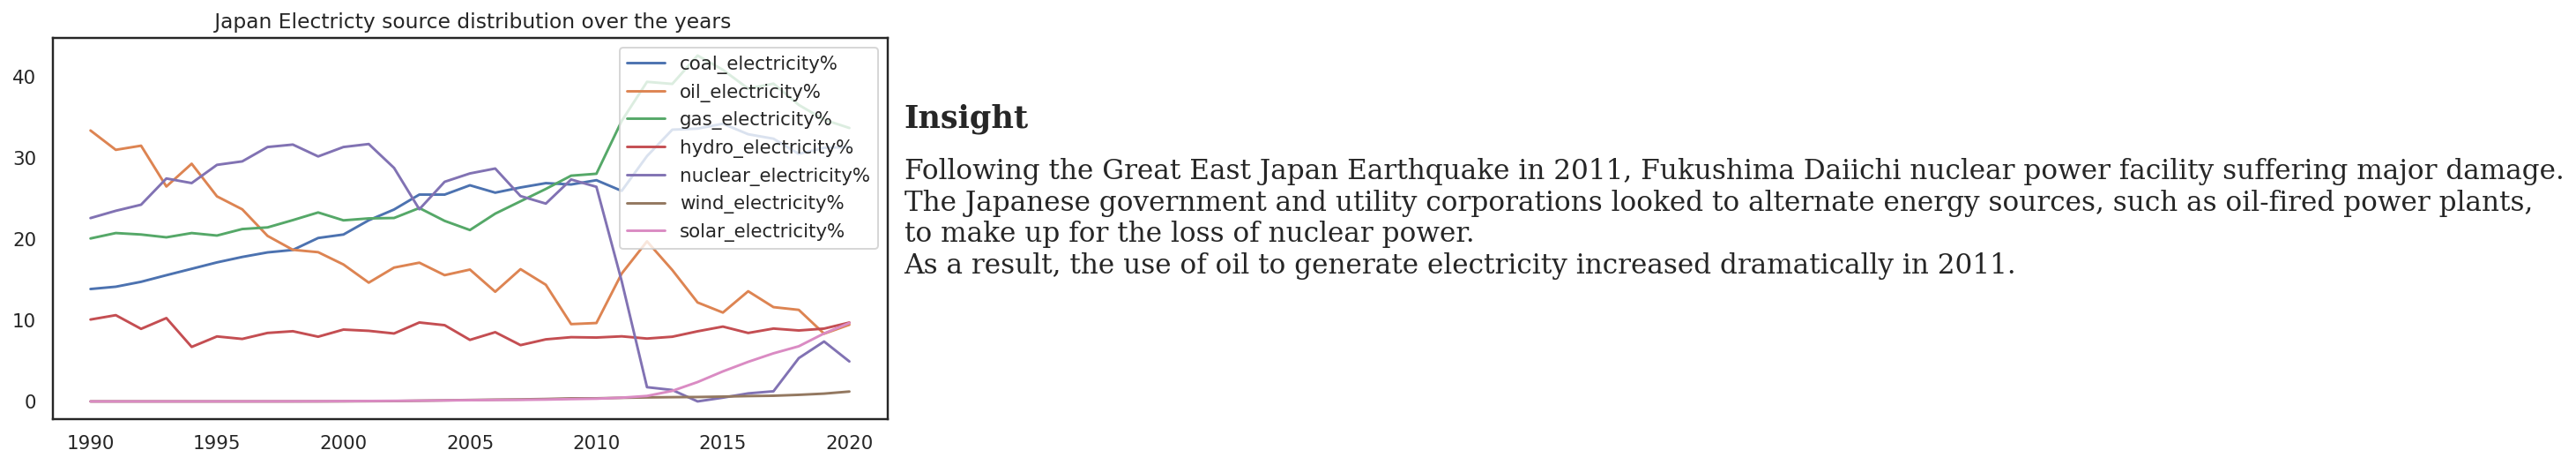

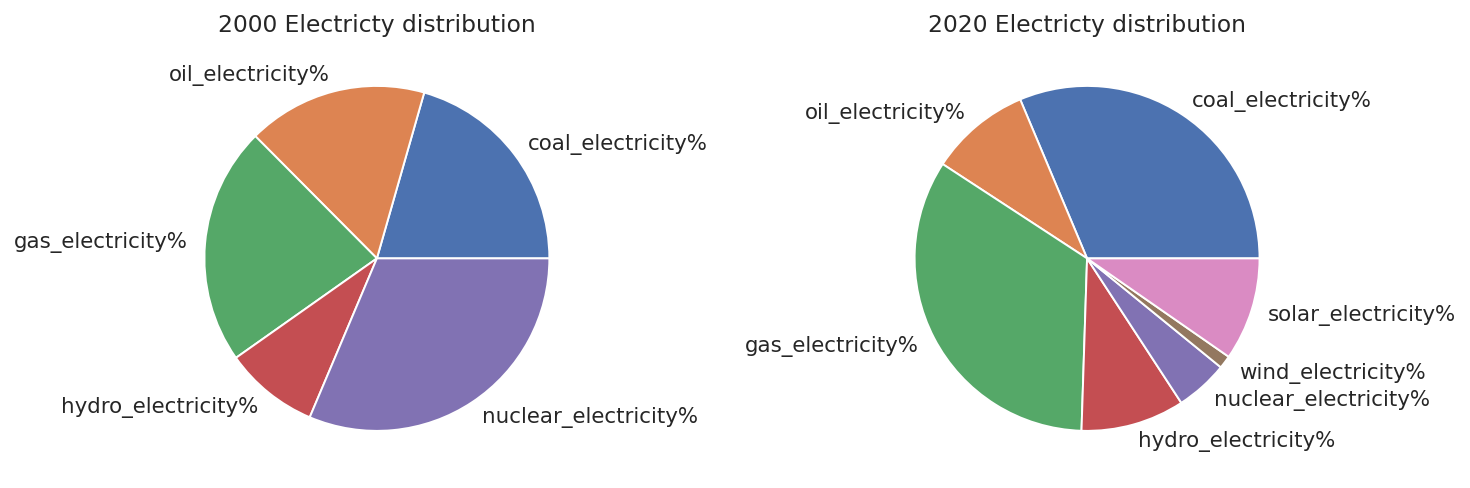

In [44]:
# get the % share of electricty from total energy sources 
Parse=['coal_electricity','oil_electricity','gas_electricity','hydro_electricity','nuclear_electricity','wind_electricity','solar_electricity']
DF['total']=DF[Parse].sum(axis=1)
DF_Electricity=DF[['year','country']]
for i in Parse:
    DF_Electricity[f"{i}%"]=round(100*(DF[i]/DF['total']),4)
# plot the change in the percentage over the years
fig, ax = plt.subplots(1, 2, figsize=(12, 4),gridspec_kw={'width_ratios':[4,1]})
chart_DF=DF_Electricity[DF_Electricity['country']=='Japan'].groupby('year').mean()
ax[0].plot(chart_DF,label=chart_DF.columns)
ax[0].set_title(" Japan Electricty source distribution over the years")
ax[0].legend()
ax[1].axis('off')
fig.text(0.7, 0.7, 'Insight', fontsize=18, fontweight='bold', fontfamily='serif')
fig.text(0.7, 0.34, '''
Following the Great East Japan Earthquake in 2011, Fukushima Daiichi nuclear power facility suffering major damage.
The Japanese government and utility corporations looked to alternate energy sources, such as oil-fired power plants, 
to make up for the loss of nuclear power.
As a result, the use of oil to generate electricity increased dramatically in 2011.
''' , fontsize=16, fontweight='light', fontfamily='serif')

#plot the pie charts for energy distribution and compare 2000 Vs 2020
#but for the pie charts its better to drop the columns with zero values to not affect the labeling
years=[2000,2020]
count=0
fig2,ay =  plt.subplots(1, 2, figsize=(12, 4))
for y in years:
    chart_DF_pie_1=chart_DF[(chart_DF.index.values==y)]
    for i in chart_DF_pie_1.columns:
        if chart_DF_pie_1.iloc[0][i]<1:
            chart_DF_pie_1.drop(columns=[i],axis=1,inplace=True)
    ay[count].pie(chart_DF_pie_1.iloc[0].values,labels=chart_DF_pie_1.columns)
    ay[count].set_title(f"{int(y)} Electricty distribution")
    count=count+1

plt.show()

**Electricity source distribution in India**

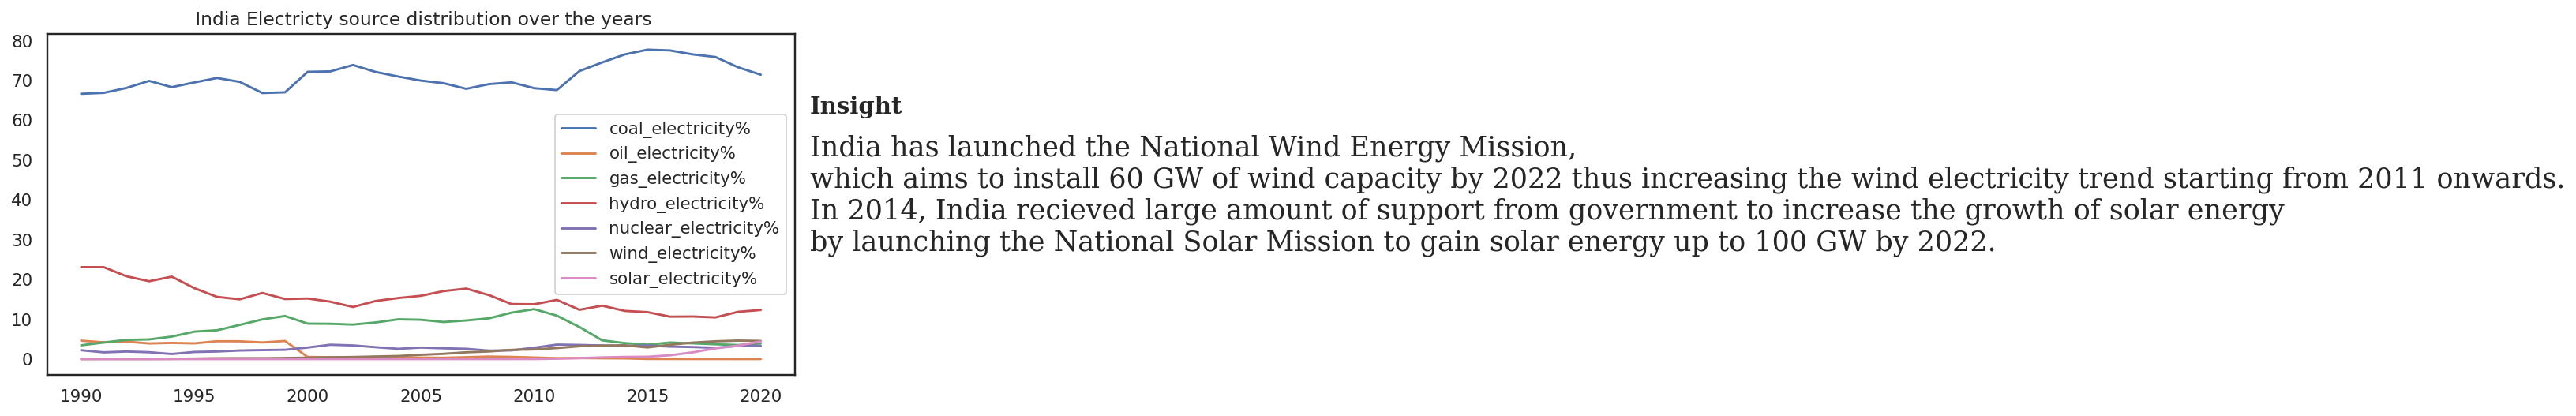

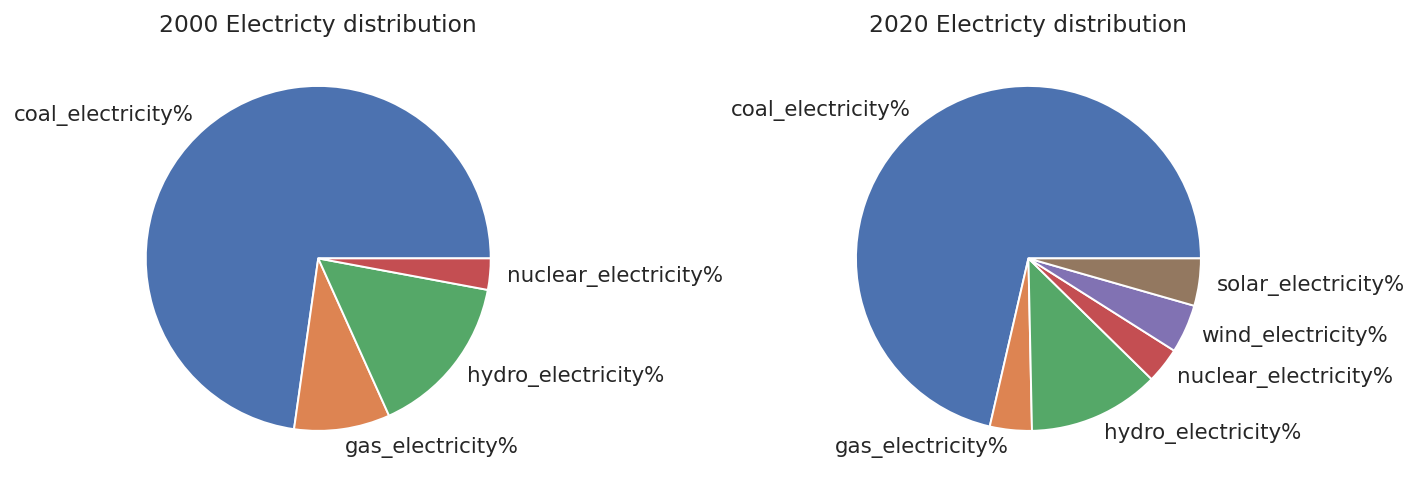

In [54]:
# get the % share of electricty from total energy sources 
Parse=['coal_electricity','oil_electricity','gas_electricity','hydro_electricity','nuclear_electricity','wind_electricity','solar_electricity']
DF['total']=DF[Parse].sum(axis=1)
DF_Electricity=DF[['year','country']]
for i in Parse:
    DF_Electricity[f"{i}%"]=round(100*(DF[i]/DF['total']),4)
# plot the change in the percentage over the years
fig, ax = plt.subplots(1, 2, figsize=(12, 4),gridspec_kw={'width_ratios':[4,1]})
chart_DF=DF_Electricity[DF_Electricity['country']=='India'].groupby('year').mean()
ax[0].plot(chart_DF,label=chart_DF.columns)
ax[0].set_title(" India Electricty source distribution over the years")
ax[0].legend()
ax[1].axis('off')
fig.text(0.7, 0.7, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.7, 0.25, '''
India has launched the National Wind Energy Mission, 
which aims to install 60 GW of wind capacity by 2022 thus increasing the wind electricity trend starting from 2011 onwards.
In 2014, India recieved large amount of support from government to increase the growth of solar energy
by launching the National Solar Mission to gain solar energy up to 100 GW by 2022.

''' , fontsize=18, fontweight='light', fontfamily='serif')

#plot the pie charts for energy distribution and compare 1990 Vs 2018
#but for the pie charts its better to drop the columns with zero values to not affect the labeling
years=[2000,2020]
count=0
fig2,ay =  plt.subplots(1, 2, figsize=(12, 4))
for y in years:
    chart_DF_pie_1=chart_DF[(chart_DF.index.values==y)]
    for i in chart_DF_pie_1.columns:
        if chart_DF_pie_1.iloc[0][i]<1:
            chart_DF_pie_1.drop(columns=[i],axis=1,inplace=True)
    ay[count].pie(chart_DF_pie_1.iloc[0].values,labels=chart_DF_pie_1.columns)
    ay[count].set_title(f"{int(y)} Electricty distribution")
    count=count+1

plt.show()

**Electricity source distribution in Malaysia**

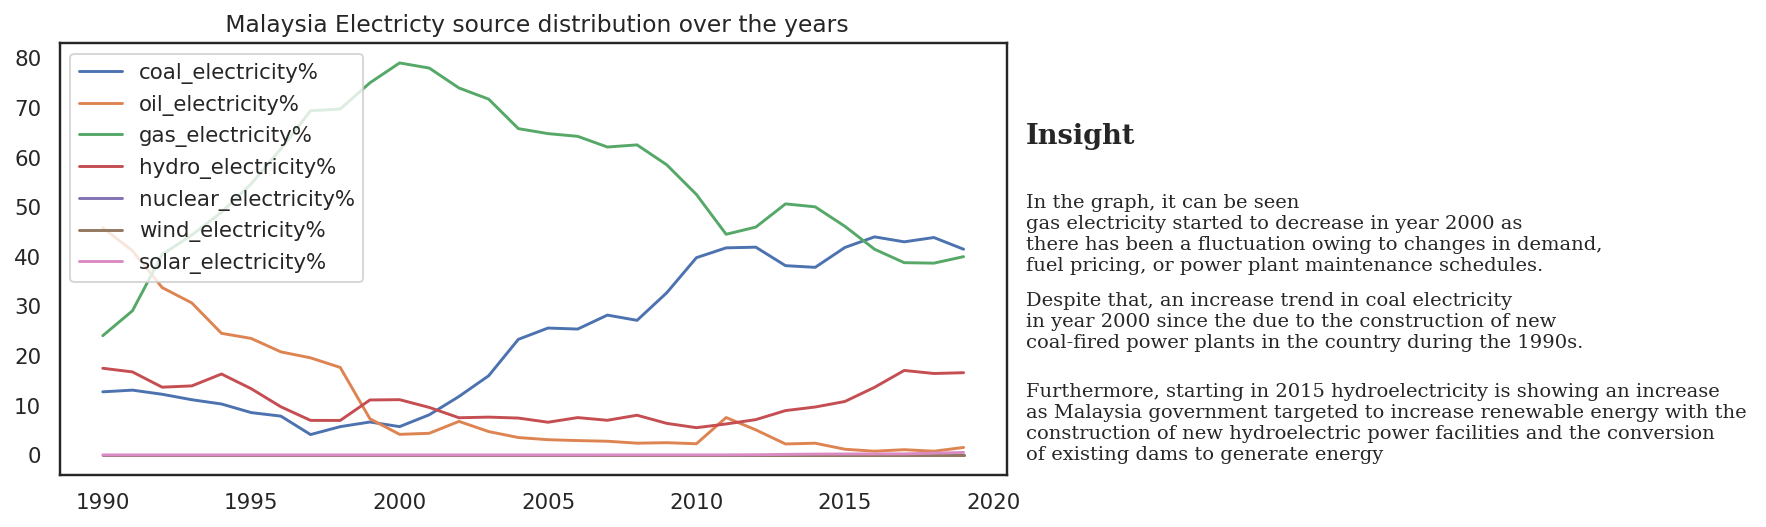

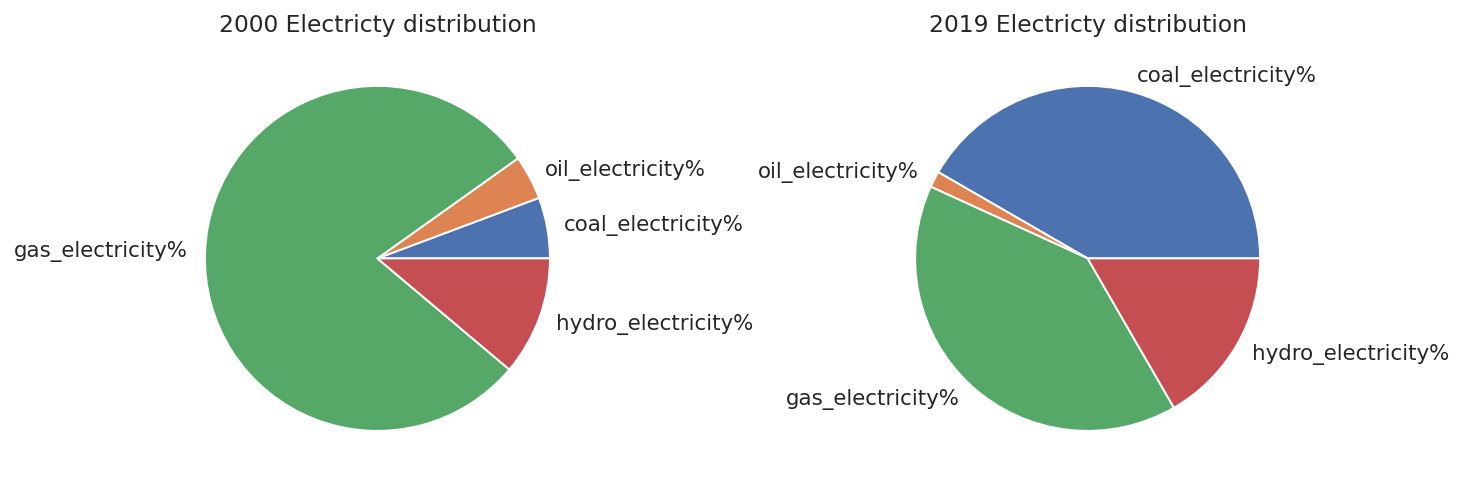

In [47]:
# get the % share of electricty from total energy sources 
Parse=['coal_electricity','oil_electricity','gas_electricity','hydro_electricity','nuclear_electricity','wind_electricity','solar_electricity']
DF['total']=DF[Parse].sum(axis=1)
DF_Electricity=DF[['year','country']]
for i in Parse:
    DF_Electricity[f"{i}%"]=round(100*(DF[i]/DF['total']),4)
# plot the change in the percentage over the years
fig, ax = plt.subplots(1, 2, figsize=(12, 4),gridspec_kw={'width_ratios':[4,1]})
chart_DF=DF_Electricity[DF_Electricity['country']=='Malaysia'].groupby('year').mean()
ax[0].plot(chart_DF,label=chart_DF.columns)
ax[0].set_title(" Malaysia Electricty source distribution over the years")
ax[0].legend()
ax[1].axis('off')
fig.text(0.7, 0.7, 'Insight', fontsize=14, fontweight='bold', fontfamily='serif')
fig.text(0.7, 0.4, '''

In the graph, it can be seen 
gas electricity started to decrease in year 2000 as 
there has been a fluctuation owing to changes in demand, 
fuel pricing, or power plant maintenance schedules. 

''' , fontsize=10, fontweight='light', fontfamily='serif')

fig.text(0.7, 0.3, '''
Despite that, an increase trend in coal electricity 
in year 2000 since the due to the construction of new 
coal-fired power plants in the country during the 1990s.
''' , fontsize=10, fontweight='light', fontfamily='serif')

fig.text(0.7, 0.1, '''
Furthermore, starting in 2015 hydroelectricity is showing an increase 
as Malaysia government targeted to increase renewable energy with the 
construction of new hydroelectric power facilities and the conversion 
of existing dams to generate energy 
''' , fontsize=10, fontweight='light', fontfamily='serif')

#plot the pie charts for energy distribution and compare 1990 Vs 2018
#but for the pie charts its better to drop the columns with zero values to not affect the labeling
years=[2000,2019]
count=0
fig2,ay =  plt.subplots(1, 2, figsize=(12, 4))
for y in years:
    chart_DF_pie_1=chart_DF[(chart_DF.index.values==y)]
    for i in chart_DF_pie_1.columns:
        if chart_DF_pie_1.iloc[0][i]<1:
            chart_DF_pie_1.drop(columns=[i],axis=1,inplace=True)
    ay[count].pie(chart_DF_pie_1.iloc[0].values,labels=chart_DF_pie_1.columns)
    ay[count].set_title(f"{int(y)} Electricty distribution")
    count=count+1

plt.show()